使用 Tensor初始化一个1×3的矩阵 M和一个 2×1的矩阵 N，对两矩阵进行减法操作（要求实现三种不同的形式），给出结果并分析三种方式的不同（如果出现报错，分析报错的原因），同时需要指出在计算过程中发生了什么


In [36]:
import torchvision

In [37]:
import torch

M=torch.rand(1,3)
N=torch.rand(2,1)

# 形式一计算过程触发了广播机制
print(M - N)

# 形式二计算过程触发了广播机制
print(torch.sub(M, N))

# 形式三，inplace（原地操作）
M.sub_(N)
print(M)


tensor([[0.3695, 0.5003, 0.1457],
        [0.5948, 0.7256, 0.3710]])
tensor([[0.3695, 0.5003, 0.1457],
        [0.5948, 0.7256, 0.3710]])


RuntimeError: output with shape [1, 3] doesn't match the broadcast shape [2, 3]

① 利用 Tensor创建两个大小分别 3×2 和 4×2的随机数矩阵P和Q，要求服从均值为0，标准差0.01为的正态分布；② 对第二步得到的矩阵 Q 进行形状变换得到 Q的转置 QT ；③ 对上述得到的矩阵P和矩阵 QT 求内积


In [38]:
P=torch.normal(mean=torch.full((3,2),0.0),std=torch.full((3,2),0.01))
Q=torch.normal(mean=torch.full((4,2),0.0),std=torch.full((4,2),0.01))
print(P)
print(Q)
Q=Q.T
print(Q)
print(torch.mm(P,Q))
print(torch.matmul(P,Q))

tensor([[ 0.0038, -0.0115],
        [-0.0057,  0.0072],
        [-0.0131, -0.0104]])
tensor([[-0.0166, -0.0132],
        [-0.0029,  0.0020],
        [-0.0089, -0.0146],
        [ 0.0218, -0.0012]])
tensor([[-0.0166, -0.0029, -0.0089,  0.0218],
        [-0.0132,  0.0020, -0.0146, -0.0012]])
tensor([[ 8.8427e-05, -3.4079e-05,  1.3376e-04,  9.8107e-05],
        [-1.8913e-06,  3.0696e-05, -5.5120e-05, -1.3221e-04],
        [ 3.5506e-04,  1.6734e-05,  2.6928e-04, -2.7288e-04]])
tensor([[ 8.8427e-05, -3.4079e-05,  1.3376e-04,  9.8107e-05],
        [-1.8913e-06,  3.0696e-05, -5.5120e-05, -1.3221e-04],
        [ 3.5506e-04,  1.6734e-05,  2.6928e-04, -2.7288e-04]])


给定公式 y_3=y_1+y_2=x^2 + x^3，且 x=1。利用学习所得到的Tensor的相关知识，求y_3对的梯度x，即dy_3/dx。要求在计算过程中，在计算x^3 时中断梯度的追踪，观察结果并进行原因分析提示, 可使用 with torch.no_grad()， 举例:with torch.no_grad():	y2 = x * 3

In [39]:
x = torch.tensor(1.0,requires_grad = True)
y1 = x**2
y2 = x**3

y3 = y1+y2
y3.backward()
print(x.grad)

tensor(5.)


In [40]:
x = torch.tensor(1.0,requires_grad = True)
y1 = x**2
with torch.no_grad():#在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。
    y2 = x**3

y3 = y1+y2
y3.backward()
print(x.grad)

tensor(2.)


要求动手从0实现 logistic 回归（只借助Tensor和Numpy相关的库）在人工构造的数据集上进行训练和测试，并从loss、训练集以及测试集上的准确率等多个角度对结果进行分析

In [41]:
import torch
from IPython import display
from matplotlib import pyplot as plt
from torch import nn
import numpy as np
import random

In [42]:
# 特征数
num_inputs = 2
# set example number
num_examples = 1000

true_w = [2.1,-3.0]
true_b = 1.3

# 生成1000*2个随机数，作为特征值
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)),dtype=torch.float)

# 根据w和b的值，生成特征相应的标签
labels = 1 / (1 + torch.exp(-1 * (true_w[0] * features[:, 0] + true_w[1] * features[:, 1]) + true_b ))

# 增加干扰
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=float)

for i in range(num_examples):
    if labels[i]>0.5:
        labels[i]=1
    else:
        labels[i]=0

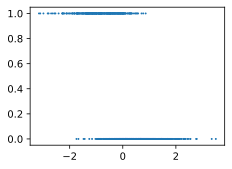

In [43]:
import matplotlib_inline


def use_svg_display():
    #用矢量图表示
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [44]:
num_inputs = 2
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # [0, 1, ..., 998, 999]
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一 个batch
        yield features.index_select(0, j), labels.index_select(0, j)

In [45]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [46]:
# 构建logistic函数
def logistic_reg(x,w,b):
    return 1/(1+torch.exp(-1*torch.mm(x,w)+b))

In [47]:
def bce_loss(y_hat,y):
    return -1 * (y * torch.log10(y_hat) + (1 - y) * torch.log10(1 - y_hat))

In [48]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [49]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [50]:
lr = 0.03#学习率
num_epochs = 10#训练周期
batch_size = 10

net = logistic_reg
loss = bce_loss

# training
#进行20轮训练，每轮训练都是分批求解，20轮结果正确率求平均
for epoch in range(num_epochs):  # training repeats num_epochs times
    # in each epoch, all the samples in dataset will be used once

    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        # calculate the gradient of batch sample loss
        l.backward()#计算梯度
        # using small batch random gradient descent to iter model parameters模型求解
        sgd([w, b], lr, batch_size)
        # reset parameter gradient梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        #模型偏差
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.281206
epoch 2, loss 0.280996
epoch 3, loss 0.280798
epoch 4, loss 0.280907
epoch 5, loss 0.281262
epoch 6, loss 0.281225
epoch 7, loss 0.282061
epoch 8, loss 0.280566
epoch 9, loss 0.281153
epoch 10, loss 0.280848


In [51]:
lr = 0.03#学习率
num_epochs = 10#训练周期
batch_size = 10

net = logistic_reg
loss = squared_loss

# training
#进行20轮训练，每轮训练都是分批求解，20轮结果正确率求平均
for epoch in range(num_epochs):  # training repeats num_epochs times
    # in each epoch, all the samples in dataset will be used once

    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        # calculate the gradient of batch sample loss
        l.backward()#计算梯度
        # using small batch random gradient descent to iter model parameters模型求解
        sgd([w, b], lr, batch_size)
        # reset parameter gradient梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        #模型偏差
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.088003
epoch 2, loss 0.076733
epoch 3, loss 0.068424
epoch 4, loss 0.062233
epoch 5, loss 0.057489
epoch 6, loss 0.053756
epoch 7, loss 0.050742
epoch 8, loss 0.048245
epoch 9, loss 0.046142
epoch 10, loss 0.044337


In [52]:
print(true_w,'\n',w)

[2.1, -3.0] 
 tensor([[ 0.7347],
        [-1.1596]], requires_grad=True)


In [53]:
print(true_b,'\n',b)

1.3 
 tensor([0.6205], requires_grad=True)


nn

In [54]:
lr = 0.03
import torch.utils.data as Data
batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 把 dataset 放入 DataLoader
data_iter = Data.DataLoader(
    dataset=dataset,      # torch TensorDataset format
    batch_size=batch_size,      # mini batch size
    shuffle=True,               # 是否打乱数据 (训练集一般需要进行打乱)
    num_workers=2,              # 多线程来读数据，注意在Windows下需要设置为0
)

In [57]:
class LogisticNet(nn.Module):
    def __init__(self,d1,d2):
        super(LogisticNet,self).__init__()
        self.linear = nn.Linear(d1,d2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.linear(x)
        z = self.sigmoid(y)
        return z

net = LogisticNet(2,10)
print(net)

LogisticNet(
  (linear): Linear(in_features=2, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


In [63]:
loss = nn.CrossEntropyLoss()
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

num_epochs = 30

for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.flatten().long())
        optimizer.zero_grad()  # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    # acc = evaluate_accuracy(data_iter,net)
    print('epoch %d, loss: %f' % (epoch, l.item()))


epoch 1, loss: 2.287245
epoch 2, loss: 2.206586
epoch 3, loss: 2.178334
epoch 4, loss: 2.096155
epoch 5, loss: 2.133678
epoch 6, loss: 2.090674
epoch 7, loss: 2.061998
epoch 8, loss: 2.076545
epoch 9, loss: 2.022861
epoch 10, loss: 2.033162
epoch 11, loss: 1.999334
epoch 12, loss: 2.016700
epoch 13, loss: 2.010527
epoch 14, loss: 1.967801
epoch 15, loss: 1.976664
epoch 16, loss: 1.942167
epoch 17, loss: 1.975794
epoch 18, loss: 1.940234
epoch 19, loss: 1.951129
epoch 20, loss: 1.935114
epoch 21, loss: 1.939042
epoch 22, loss: 1.914140
epoch 23, loss: 1.913574
epoch 24, loss: 1.896603
epoch 25, loss: 1.898023
epoch 26, loss: 1.870401
epoch 27, loss: 1.893895
epoch 28, loss: 1.893917
epoch 29, loss: 1.871538
epoch 30, loss: 1.893283


softmax

In [66]:
import torch
import torchvision
import torchvision.transforms as transforms

mnist_train = torchvision.datasets.FashionMNIST(root='D/Datasets/FashionMNIST', train=True,
download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='D/Datasets/FashionMNIST', train=False,
download=True, transform=transforms.ToTensor())



100.0%


Extracting D/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to D/Datasets/FashionMNIST\FashionMNIST\raw



31.2%

100.6%


Extracting D/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to D/Datasets/FashionMNIST\FashionMNIST\raw



0.8%

100.0%


Extracting D/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to D/Datasets/FashionMNIST\FashionMNIST\raw



119.3%

Extracting D/Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to D/Datasets/FashionMNIST\FashionMNIST\raw




E:\anaconda\envs\dl\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [77]:
num_workers = 0
batch_size=256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
                                         num_workers=num_workers,drop_last= True)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
                                        num_workers=num_workers,drop_last=True)

In [78]:
w = torch.tensor(np.random.normal(1,1,(784,10)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [79]:
def lin_reg(X,w,b):
    xsize = X.size()
    return torch.mm(X.reshape(-1,784),w)+b

In [80]:
# loss
import numpy as np

def softmax(X):
    # 计算每行的最大值
    row_max = X.max(axis=1).values
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况；这个trick不影响softmax的结果
    row_max = row_max.reshape(-1, 1)
    X = X - row_max
    X_exp = torch.exp(X)
    partition = X_exp + torch.ones(X.size())
    predict = X_exp / partition
    return predict #这里应用了广播机制

def entropy_loss(yhat, y):
    loss = 0.0
    for i in range(0,batch_size):
        #print(y)
        y_softmax = softmax(yhat)
        index = y[i]
        loss -= y_softmax[i][index].log() #不能用Math.log
        #print(loss)
    return loss

In [81]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [82]:
def evaluate_accuracy(iter):
    acc_sum, n = 0.0, 0
    for X, y in iter:
        torch.reshape(X,(-1,784))
        y_out = softmax(lin_reg(X, w, b))
        value,index = y_out.max(axis=1)
        yhat = torch.tensor(index,dtype=int)
        d = ( yhat== y).sum().item()
        acc_sum +=d
        n += y.shape[0]
    return acc_sum / n

In [83]:
# Hyperparameters
lr = 0.01
num_epochs = 20
batch_size = 256

for epoch in range(num_epochs):
    train_size = 0
    for data in train_iter:
        train_size +=1
        instance, label = data[0],data[1]
        predict = lin_reg(instance, w, b)
        l =  entropy_loss(predict,label)
        l.backward()
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    print(train_size)

    #test accuracy
    epoch_loss = 0
    test_size = 0
    for data in test_iter:
        instance, label = data[0], data[1]
        epoch_loss +=  entropy_loss(lin_reg(instance,w,b),label)
        test_size += 1
    print(test_size)
    print('epoch %d,loss %f' % (epoch+1,(epoch_loss.item())/ test_size))
    epoch_acc = evaluate_accuracy(test_iter)
    epoch_acc2 = evaluate_accuracy(train_iter)
    print('acc %f on test set, %f on training set' % (epoch_acc,epoch_acc2))

234
39
epoch 1,loss 1735.040264


E:\anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


acc 0.183093 on test set, 0.182108 on training set
234
39
epoch 2,loss 1205.951823
acc 0.305689 on test set, 0.304420 on training set
234
39
epoch 3,loss 997.691707
acc 0.382812 on test set, 0.384315 on training set
234
39
epoch 4,loss 887.634716
acc 0.431490 on test set, 0.435597 on training set
234
39
epoch 5,loss 816.703375
acc 0.460637 on test set, 0.469685 on training set
234
39
epoch 6,loss 765.647987
acc 0.483574 on test set, 0.493273 on training set
234
39
epoch 7,loss 726.148538
acc 0.505008 on test set, 0.512537 on training set
234
39
epoch 8,loss 694.424028
acc 0.522536 on test set, 0.529698 on training set
234
39
epoch 9,loss 668.103265
acc 0.536959 on test set, 0.543987 on training set
234
39
epoch 10,loss 645.822015
acc 0.551182 on test set, 0.557826 on training set
234
39
epoch 11,loss 627.104367
acc 0.558393 on test set, 0.567224 on training set
234
39
epoch 12,loss 610.368940
acc 0.567808 on test set, 0.576873 on training set
234
39
epoch 13,loss 595.673528
acc 0.58183

NN

In [86]:
# Hyperparameters
lr = 0.01
batch_size = 3
num_workers = 0


# data
import torch
import torchvision
import torchvision.transforms as transforms

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
                                         num_workers=num_workers,drop_last= True)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
                                        num_workers=num_workers,drop_last=True)

In [87]:
# Model
import torch
import torch.nn as nn

class SoftmaxReg(nn.Module):
    def __init__(self,n_feature):
        super().__init__()
        # define the transform dimensions
        self.linear = nn.Linear(n_feature,10)
    def forward(self,x):
        y = self.linear(x)
        return y

feature_length = 784

net = SoftmaxReg(feature_length)

# Loss
loss = torch.nn.NLLLoss()

#optimization
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03)

In [88]:
def evaluate_accuracy(iter):
    acc_sum, n = 0.0, 0
    for X, y in iter:
        X = torch.reshape(X, (-1,feature_length))
        m = nn.LogSoftmax(dim=1)
        y_out = m(net(X))
        value, index = y_out.max(axis=1)
        yhat = torch.tensor(index, dtype=int)
        d = (yhat == y).sum().item()
        acc_sum += d
        n += y.shape[0]
    return acc_sum / n


num_of_epochs = 20
for epoch in range (0, num_of_epochs):
    for instance, label in train_iter:
        normal_instance = torch.reshape(instance,(batch_size,-1))
        output = net(normal_instance)
        criteria = nn.NLLLoss() #调用loss函数必须分开定义；NLLloss可以直接映射到非onehot vector
        m = nn.LogSoftmax(dim=1) #使用Torch自带的Softmax函数，精度更高
        l = criteria(m(output),label)
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        #print('epoch %d, loss: %f' % (epoch, l.item()))
    epoch_loss = 0
    test_size = 0
    for data in test_iter:
        instance, label = data[0], data[1]
        criteria = nn.NLLLoss()
        m = nn.LogSoftmax(dim=1)
        epoch_loss += criteria(m(net(instance.reshape(-1,784))), label)
        test_size += 1
    print('epoch %d,loss %f' % (epoch+1,(epoch_loss.item())/ test_size))
    epoch_acc = evaluate_accuracy(test_iter)
    epoch_acc2 = evaluate_accuracy(train_iter)
    print('acc %f on test set, %f on training set' % (epoch_acc,epoch_acc2))


epoch 1,loss 0.594356


E:\anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


acc 0.821482 on test set, 0.832983 on training set
epoch 2,loss 0.639208
acc 0.791379 on test set, 0.810633 on training set
epoch 3,loss 0.583111
acc 0.801980 on test set, 0.825150 on training set
epoch 4,loss 0.645526
acc 0.809881 on test set, 0.826483 on training set
epoch 5,loss 0.693112
acc 0.793579 on test set, 0.812417 on training set
epoch 6,loss 0.655349
acc 0.808881 on test set, 0.830417 on training set
epoch 7,loss 0.537279
acc 0.822882 on test set, 0.846467 on training set
epoch 8,loss 0.635211
acc 0.816182 on test set, 0.835850 on training set
epoch 9,loss 0.625768
acc 0.798880 on test set, 0.827567 on training set
epoch 10,loss 0.599338
acc 0.819782 on test set, 0.840117 on training set
epoch 11,loss 0.493181
acc 0.841484 on test set, 0.866950 on training set
epoch 12,loss 0.527383
acc 0.824082 on test set, 0.857867 on training set
epoch 13,loss 0.538437
acc 0.836784 on test set, 0.857967 on training set
epoch 14,loss 0.544084
acc 0.825183 on test set, 0.851617 on training

k

In [96]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
# from pandas import *
%matplotlib inline

In [97]:
#加载数据集
features = torch.rand(10000, 500)
labels = (0.0056 * features).sum(dim=1) + 0.028
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()), dtype=torch.float)

In [98]:
def get_data_iter(X_train, y_train, X_valid, y_valid,batch_size):
    train_dataset = torch.utils.data.TensorDataset(X_train.cuda(),y_train.cuda())
    test_dataset = torch.utils.data.TensorDataset(X_valid.cuda(),y_valid.cuda())
    train_iter = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
    test_iter = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
    return train_iter, test_iter

In [99]:
#定义网络
class LinearNet(nn.Module):
    def __init__(self,num_inputs,num_outputs,num_hiddens):
        super(LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)

    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.relu(x)
        return y

In [100]:
#模型训练
def train(train_iter,test_iter,if_reshape,num_epochs,num_inputs,net,loss):
    optimizer = torch.optim.SGD(net.parameters(),lr=0.001)
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        if if_reshape ==False:
            for X,y in train_iter:
                l=loss(net(X),y.view(-1,1))
                optimizer.zero_grad()
                l.backward()
                optimizer.step()
                ls += l.item()
                count += y.shape[0]
            train_ls.append(ls/count)
            ls, count = 0, 0
            for X,y in test_iter:
                l=loss(net(X),y.view(-1,1))
                ls += l.item()
                count += y.shape[0]
        else:
            for X,y in train_iter:
                X = X.reshape(-1,num_inputs)
                l=loss(net(X),y).sum()
                optimizer.zero_grad()
                l.backward()
                optimizer.step()
                ls += l.item()
                count += y.shape[0]
            train_ls.append(ls/count)
            ls, count = 0, 0
            for X,y in test_iter:
                X = X.reshape(-1,num_inputs)
                l=loss(net(X),y).sum()
                ls += l.item()
                count += y.shape[0]
        test_ls.append(ls/count)
        if(epoch+1)%5==0:
            print('epoch: %d, train loss: %f, valid loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [101]:
def get_kfold_data(k, i, X, y):
    fold_size = X.shape[0]//k
    val_start = i * fold_size
    if i  != k - 1:
        val_end = (i + 1) * fold_size
        X_valid, y_valid = X[val_start:val_end],y[val_start:val_end]
        X_train = torch.cat((X[0:val_start],X[val_end:]),dim=0)
        y_train = torch.cat((y[0:val_start],y[val_end:]),dim=0)
    else:
        X_valid,y_valid = X[val_start:], y[val_start:]
        X_train = X[0:val_start]
        y_train = y[0:val_start]

    return X_train, y_train, X_valid, y_valid

In [102]:
def k_fold(k, X_train, y_train,if_reshape,num_epochs,num_inputs,net,loss):
    my_k_train_ls, my_k_valid_ls = [], []
    train_loss_sum, valid_loss_sum = 0, 0
    for i in range(k):
        print('第', i+1, '折验证结果')
        X_train, y_train, X_valid, y_valid = get_kfold_data(k, i, X_train, y_train)
        train_iter, valid_iter = get_data_iter(X_train, y_train, X_valid, y_valid,batch_size=100)
        train_loss, val_loss = train(train_iter,valid_iter,if_reshape,num_epochs,num_inputs,net,loss)

        my_k_train_ls.append(train_loss)
        my_k_valid_ls.append(val_loss)
        train_loss_sum += train_loss[-1]
        valid_loss_sum += val_loss[-1]

    print("最终平均k折交叉验证结果")

    print(f'average train loss: {train_loss_sum/k}')
    print(f'average valid loss: {valid_loss_sum/k}')

    return my_k_train_ls, my_k_valid_ls

In [103]:
k=10
mynum_epochs= 20
num_inputs,num_outputs,num_hiddens = 500,1,256
mynet = LinearNet(num_inputs, num_outputs, num_hiddens).cuda()
MSEloss= nn.MSELoss()

# record_k_train_ls, record_k_valid_ls = k_fold(k, X_train, y_train,if_reshape=False,num_epochs=20,num_inputs,net ,loss)
my_k_train_ls, my_k_valid_ls = k_fold(k, features, labels,if_reshape=False,num_epochs=mynum_epochs,num_inputs = 500,net =mynet,loss= MSEloss)

第 1 折验证结果
epoch: 5, train loss: 0.000058, valid loss: 0.000059
epoch: 10, train loss: 0.000053, valid loss: 0.000055
epoch: 15, train loss: 0.000049, valid loss: 0.000051
epoch: 20, train loss: 0.000046, valid loss: 0.000048
第 2 折验证结果
epoch: 5, train loss: 0.000043, valid loss: 0.000045
epoch: 10, train loss: 0.000041, valid loss: 0.000042
epoch: 15, train loss: 0.000038, valid loss: 0.000040
epoch: 20, train loss: 0.000036, valid loss: 0.000038
第 3 折验证结果
epoch: 5, train loss: 0.000034, valid loss: 0.000038
epoch: 10, train loss: 0.000033, valid loss: 0.000037
epoch: 15, train loss: 0.000031, valid loss: 0.000035
epoch: 20, train loss: 0.000030, valid loss: 0.000034
第 4 折验证结果
epoch: 5, train loss: 0.000029, valid loss: 0.000034
epoch: 10, train loss: 0.000028, valid loss: 0.000033
epoch: 15, train loss: 0.000027, valid loss: 0.000031
epoch: 20, train loss: 0.000026, valid loss: 0.000030
第 5 折验证结果
epoch: 5, train loss: 0.000026, valid loss: 0.000026
epoch: 10, train loss: 0.000025, vali

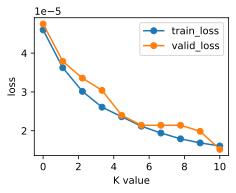

In [104]:
# 绘图
train_loss, valid_loss = [], []
for i in range(len(my_k_train_ls)):
    train_loss.append(my_k_train_ls[i][-1])
    valid_loss.append(my_k_valid_ls[i][-1])

x = np.linspace(0,len(my_k_train_ls),len(my_k_train_ls))
plt.plot(x,train_loss,'o-',label='train_loss',linewidth=1.5)
plt.plot(x,valid_loss,'o-',label='valid_loss',linewidth=1.5)
plt.xlabel('K value')
plt.ylabel('loss')
plt.legend()
plt.show()

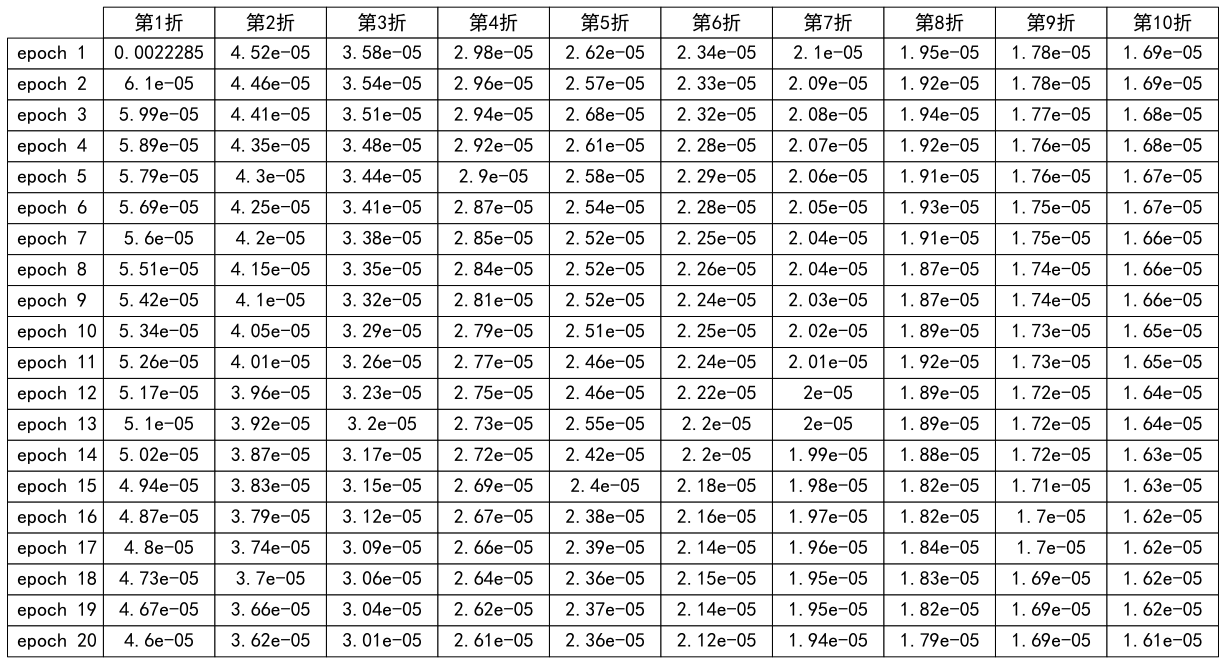

In [106]:
import pandas as pd
# 绘制表格
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
randn = np.random.randn
idx = []
for i in range(1,21):
    idx.append(f'epoch {i}')

data_train, data_valid = np.zeros((10,20)),np.zeros((10,20))
for i in range(10):
    for j in range(20):
        data_train[i,j], data_valid[i,j] = my_k_train_ls[i][j], my_k_valid_ls[i][j]

df = pd.DataFrame(data_train.T, index=idx, columns=['第1折', '第2折', '第3折', '第4折', '第5折',
                                                '第6折', '第7折', '第8折', '第9折', '第10折'])

vals = np.around(df.values,7)
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns,
                    colWidths = [0.1]*vals.shape[1], loc='center',cellLoc='center')
the_table.set_fontsize(20)

the_table.scale(2.5,2.58)